In [35]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv('/home/atthewm/Documents/DataProjects/movies_data/movies.csv')


In [36]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [8]:
# Check for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [37]:
# change budget to int
df['budget'] = df['budget'].astype('Int64')
df['budget'].dtypes

Int64Dtype()

In [43]:
# 'year' and the year in 'released' are not always the same
# change 'year' to year in 'released'

df['year'] = df['released'].astype(str).str[:4]


In [39]:
# highest and lowest grossing movies? 
df.sort_values(by=['gross'],inplace=False,ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [40]:
# what companies make the most movies?
df['company'].value_counts()

Universal Pictures                                                 377
Warner Bros.                                                       334
Columbia Pictures                                                  332
Paramount Pictures                                                 320
Twentieth Century Fox                                              240
New Line Cinema                                                    174
Touchstone Pictures                                                132
Metro-Goldwyn-Mayer (MGM)                                          125
Walt Disney Pictures                                               123
TriStar Pictures                                                    94
Dreamworks Pictures                                                 76
Miramax                                                             74
Fox 2000 Pictures                                                   63
Orion Pictures                                                      60
Summit

In [ ]:
# guesses for high correlation to revenue
# budget, company, score, star

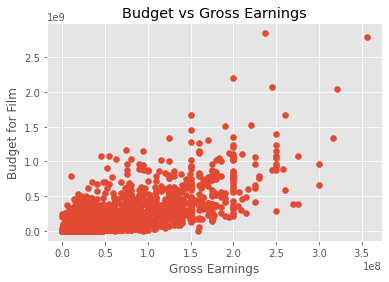

In [25]:
# scatter plot budget vs gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

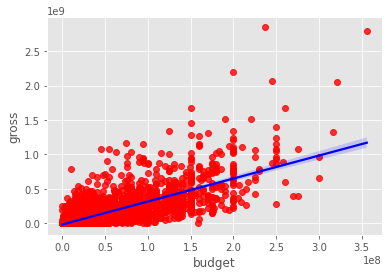

In [27]:
# plot budget vs gross using seaborn
sns.regplot(x='budget',y='gross',data=df,scatter_kws={'color':'red'},line_kws={'color':'blue'})

In [28]:
df.corr()
# high correlation between budget and gross

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.329321  0.257486  0.120811
score    0.097995  1.000000  0.409182  0.076254  0.186258  0.399451
votes    0.222945  0.409182  1.000000  0.442429  0.630757  0.309212
budget   0.329321  0.076254  0.442429  1.000000  0.740395  0.320447
gross    0.257486  0.186258  0.630757  0.740395  1.000000  0.245216
runtime  0.120811  0.399451  0.309212  0.320447  0.245216  1.000000

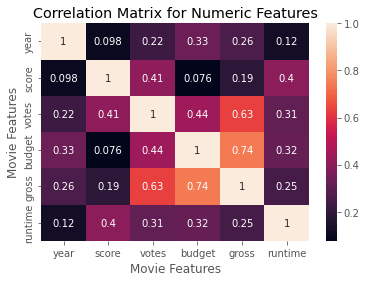

In [30]:
# plot heatmap of a the numeric correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [44]:
# create new dataframe where qualitative data is numerically encoded
df_numerized = df.copy()
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
       df_numerized[col_name] = df_numerized[col_name].astype('category') 
       df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
0  6587       6      6    14      1705    8.4   927000.0      2589    4014   
1  5573       6      1    13      1492    5.8    65000.0      2269    1632   
2  5142       4      0    14      1771    8.7  1200000.0      1111    2567   
3   286       4      4    13      1492    7.7   221000.0      1301    2000   
4  1027       6      4    13      1543    7.3   108000.0      1054     521   

   star  country    budget        gross  company  runtime  
0  1047       54  19000000   46998772.0     2319    146.0  
1   327       55   4500000   58853106.0      731    104.0  
2  1745       55  18000000  538375067.0     1540    124.0  
3  2246       55   3500000   83453539.0     1812     88.0  
4   410       55   6000000   39846344.0     1777     98.0

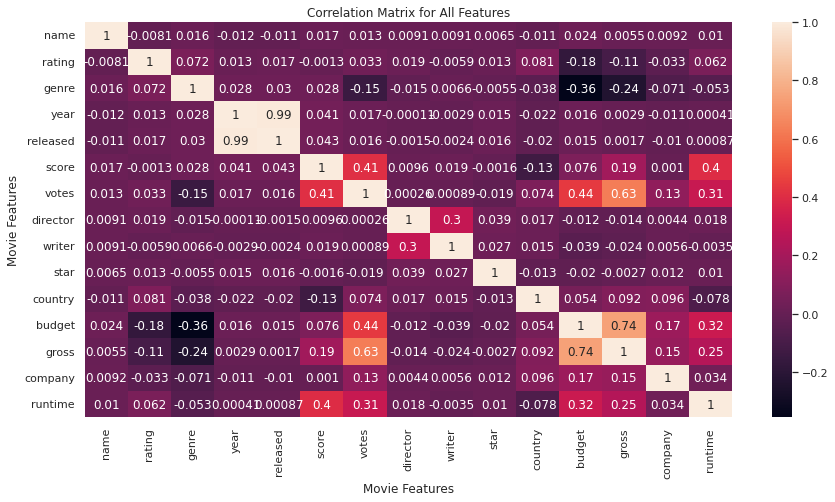

In [54]:
# plot heatmap of a the total correlation matrix
corr_matrix = df_numerized.corr()
sns.set(rc={'figure.figsize':(14.5,7.27)})
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [57]:
# unstack correlation matrix
corr_mat = df_numerized.corr()
corr_pairs = corr_mat.unstack()
corr_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year       -0.011725
          released   -0.011311
          score       0.017097
          votes       0.013088
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.023970
          gross       0.005533
          company     0.009211
          runtime     0.010392
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.013475
          released    0.016613
          score      -0.001314
          votes       0.033225
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.176002
          gross      -0.107339
          company    -0.032943
          runtime     0.062145
genre     name        0.016355
          rating      0.072423
        

In [59]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.356564
genre     budget     -0.356564
          gross      -0.235650
gross     genre      -0.235650
rating    budget     -0.176002
budget    rating     -0.176002
genre     votes      -0.145307
votes     genre      -0.145307
country   score      -0.133348
score     country    -0.133348
rating    gross      -0.107339
gross     rating     -0.107339
country   runtime    -0.078412
runtime   country    -0.078412
genre     company    -0.071067
company   genre      -0.071067
genre     runtime    -0.052711
runtime   genre      -0.052711
writer    budget     -0.039451
budget    writer     -0.039451
country   genre      -0.037615
genre     country    -0.037615
rating    company    -0.032943
company   rating     -0.032943
writer    gross      -0.023519
gross     writer     -0.023519
year      country    -0.022277
country   year       -0.022277
released  country    -0.020427
country   released   -0.020427
star      budget     -0.019589
budget    star       -0.019589
votes   

In [64]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross     votes       0.630757
votes     gross       0.630757
gross     budget      0.740395
budget    gross       0.740395
released  year        0.993694
year      released    0.993694
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
# votes and budget have the highest correlation to gross earnings